# Non Linear Regression

Configure the project. Indeed you create a dataset in csv format.

In [88]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! head -n 1 *.csv | head -n 2 | tail -n 1 > data.csv && for file in *.csv; do (tail -n +2 "$file"; echo) >> data.csv; done && sed -i '/^$/d' data.csv

Archive:  ./dataset/archive.zip
  inflating: exam_scores (1).csv     


Import needed libraries

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, jaccard_score, accuracy_score

%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [90]:
df = pd.read_csv("data.csv")
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,Exam Score1,Exam Score2,Pass
0,86.40,9.94,0
1,74.60,66.55,1
2,14.13,23.67,0
3,36.05,33.85,0
4,37.02,16.80,0


In [91]:
# summarize data
df.describe() 

,Exam Score1,Exam Score2,Pass
count,400.000000,400.000000,400.000000
mean,49.812650,52.264925,0.280000
std,28.141381,29.348627,0.449561
min,0.240000,0.460000,0.000000
25%,24.010000,27.070000,0.000000
50%,50.735000,53.180000,0.000000
75%,75.442500,78.900000,1.000000
max,99.640000,99.990000,1.000000


Print the histogram chart of data

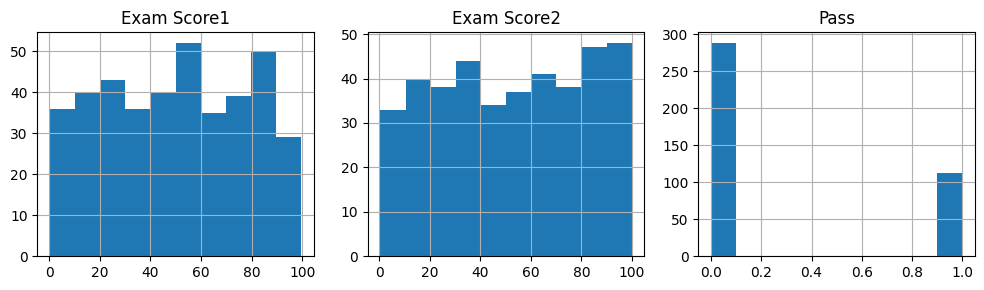

In [92]:
viz = df[["Exam Score1", "Exam Score2", "Pass"]]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

viz["Exam Score1"].hist(ax=axes[0])
axes[0].set_title('Exam Score1')
viz["Exam Score2"].hist(ax=axes[1])
axes[1].set_title('Exam Score2')
viz["Pass"].hist(ax=axes[2])
axes[2].set_title('Pass')
plt.tight_layout()
plt.show()

Print scatter plot of data to recognize the patterns of data.

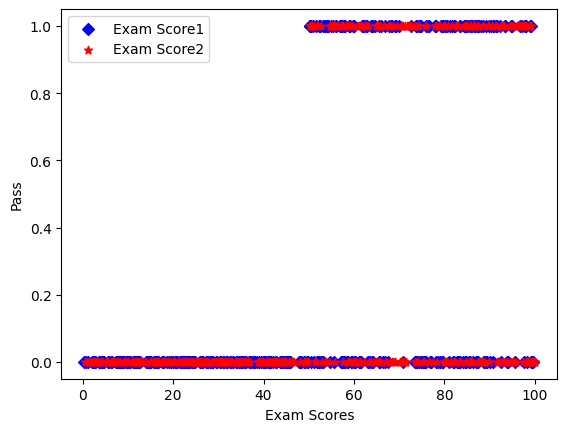

In [113]:
plt.scatter(df["Exam Score1"], df.Pass, color="blue", label="Exam Score1", marker='D')
plt.scatter(df["Exam Score2"], df.Pass, color="red", label="Exam Score2", marker='*')
plt.ylabel("Pass")
plt.xlabel("Exam Scores")
plt.legend()
plt.show()

In [94]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

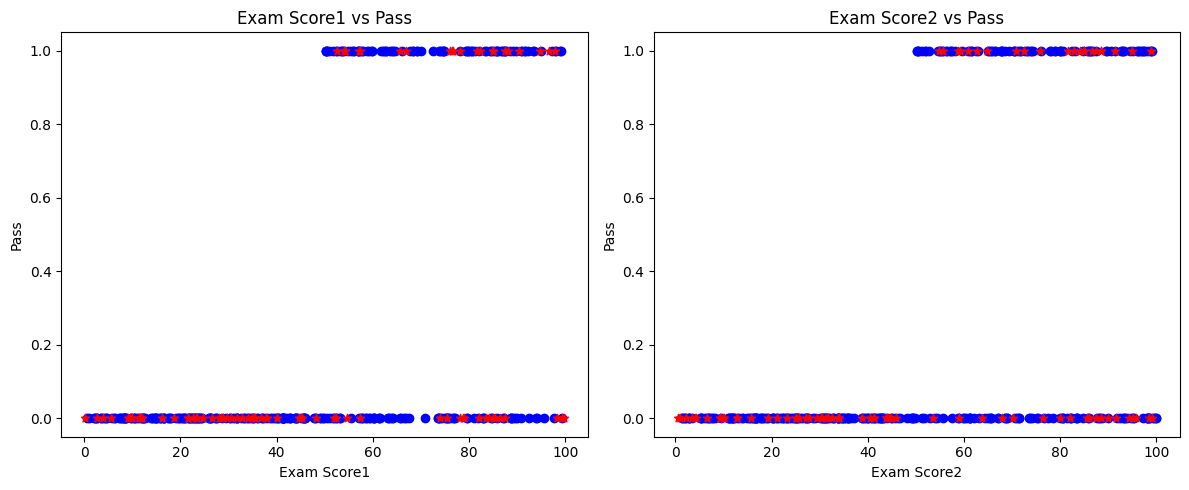

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot for "Exam Score1" vs "Pass"
ax1.scatter(train["Exam Score1"], train.Pass, color="blue", label="Train", marker='o')
ax1.scatter(test["Exam Score1"], test.Pass, color="red", label="Test", marker='*')
ax1.set_ylabel("Pass")
ax1.set_xlabel("Exam Score1")
ax1.set_title("Exam Score1 vs Pass")

# Second subplot for "Exam Score2" vs "Pass"
ax2.scatter(train["Exam Score2"], train.Pass, color="blue", label="Train", marker='o')
ax2.scatter(test["Exam Score2"], test.Pass, color="red", label="Test", marker='*')
ax2.set_ylabel("Pass")
ax2.set_xlabel("Exam Score2")
ax2.set_title("Exam Score2 vs Pass")

# Display the plots
plt.tight_layout()
plt.show()

Find the best fitted line based on distribution of data. 

In [96]:
train_x = np.asanyarray(train[['Exam Score1', 'Exam Score2']])
train_y = np.asanyarray(train[['Pass']])

# Converting to 1D array
train_y = train_y.ravel()  # or train_y = train_y.flatten()

reg = linear_model.LogisticRegression(C=1, solver="lbfgs")
reg.fit(train_x, train_y)

print("Coefficients:\t", reg.coef_)
print("Intercept:\t", reg.intercept_)

Coefficients:	 [[0.12 0.1 ]]
Intercept:	 [-14.03]


Compare predicted answers with real answers...

In [41]:
test_x = np.asanyarray(test[['Exam Score1', 'Exam Score2']])
test_y = np.asanyarray(test[['Pass']])
test_y = test_y.ravel()  # or train_y = train_y.flatten()

test_y_ = reg.predict(test_x)
test_y_prob = reg.predict_proba(test_x)
test_y_prob = test_y_prob.ravel()

print("Predicted values:")
print(test_y_)
print("\nReal values:")
print(test_y)
print("\nProbability of each case:")
print(test_y_prob)

Predicted values:
[1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0]

Real values:
[1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 1 0]

Probability of each case:
[3.48e-02 9.65e-01 9.63e-01 3.69e-02 9.28e-01 7.16e-02 2.86e-03 9.97e-01
 1.00e+00 1.14e-05 7.79e-01 2.21e-01 8.33e-01 1.67e-01 2.00e-03 9.98e-01
 6.84e-01 3.16e-01 1.00e+00 2.45e-04 1.00e+00 3.24e-05 9.79e-01 2.13e-02
 9.72e-01 2.76e-02 1.00e+00 2.64e-05 5.12e-02 9.49e-01 1.51e-01 8.49e-01
 3.21e-01 6.79e-01 9.87e-01 1.29e-02 9.99e-01 7.32e-04 8.65e-01 1.35e-01
 3.52e-01 6.48e-01 9.21e-01 7.94e-02 9.51e-01 4.93e-02 8.77e-03 9.91e-01
 9.42e-01 5.78e-02 8.98e-01 1.02e-01 6.76e-01 3.24e-01 9.64e-01 3.55e-02
 2.35e-02 9.77e-01 7.71e-01 2.29e-01 1.00e+00 1.25e-06 9.86e-01 1.38e-02
 1.00e+00 6.52e-05 1.00e+00 4

### The jaccard score:

In [78]:
print("The jaccard score for 0's:")
print(jaccard_score(test_y, test_y_, pos_label=0))
print("\nThe jaccard score for 1's:")
print(jaccard_score(test_y, test_y_, pos_label=1))

The jaccard score for 0's:
0.873015873015873

The jaccard score for 1's:
0.68


### Confusion Matrix: 

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(test_y, test_y_, labels=[1,0]))

[[17  5]
 [ 3 55]]


Print confusion matrix

Confusion matrix, without normalization
[[17  5]
 [ 3 55]]


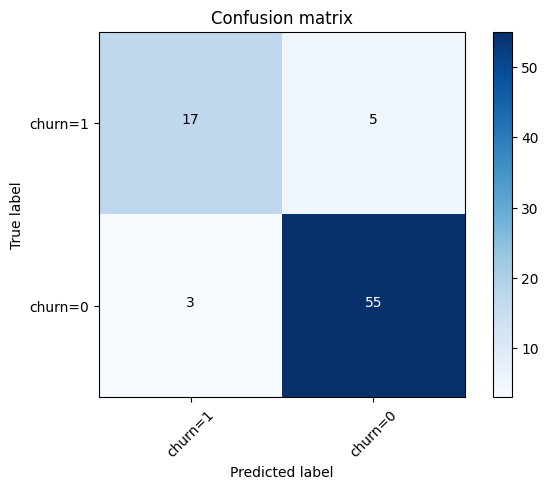

In [44]:
cnf_matrix = confusion_matrix(test_y, test_y_, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [45]:
print (classification_report(test_y, test_y_))
TN, FP, FN, TP = cnf_matrix.ravel()
specificity = TN / (TN + FP)
print('Specificity:', specificity)
print('Accuracy:', accuracy_score(test_y, test_y_))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.85      0.77      0.81        22

    accuracy                           0.90        80
   macro avg       0.88      0.86      0.87        80
weighted avg       0.90      0.90      0.90        80

Specificity: 0.7727272727272727
Accuracy: 0.9


## Result

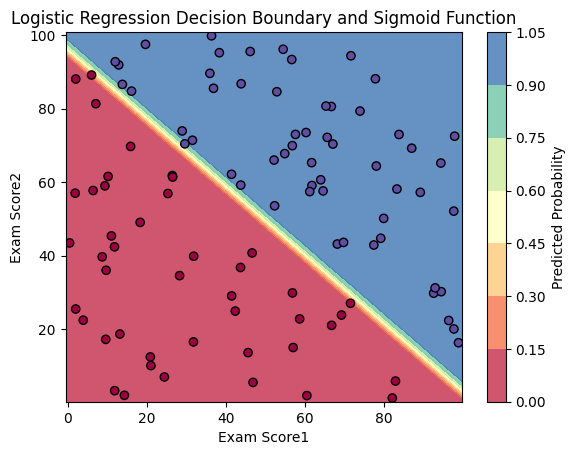

In [57]:
x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Compute the probabilities (sigmoid function)
Z = reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.colorbar(label='Predicted Probability')

# Scatter plot of the original data points
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, edgecolors='k', marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Exam Score1')
plt.ylabel('Exam Score2')
plt.title('Logistic Regression Decision Boundary and Sigmoid Function')

plt.show()